In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# jupyter notebook specific commands
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]

In [3]:
directory = '../csvs/'
os.chdir(directory)
files = os.listdir(directory)

In [4]:
chans = []
snrs = []
# snrs = np.zeros(len(files))
for i, file in enumerate(files):
    fn = file[:-4]
    fn = fn.rsplit('_', 1)
    chans.append(fn[0])
    snrs.append(fn[1])
    
chans = np.unique(chans).tolist()
snrs = np.unique(snrs).tolist()

In [5]:
chans

['blur_m', 'blur_mp', 'iq', 'iqmpu', 'm', 'mp', 'mu']

In [6]:
snrs

['-10',
 '-12',
 '-14',
 '-16',
 '-18',
 '-2',
 '-20',
 '-4',
 '-6',
 '-8',
 '0',
 '10',
 '12',
 '14',
 '16',
 '18',
 '2',
 '4',
 '6',
 '8']

In [7]:
iterables = [chans, snrs]
index = pd.MultiIndex.from_product(iterables, names=['ch', 'snr'])

In [8]:
df = pd.DataFrame()
for file in files:
    tmp = pd.DataFrame()
    fn = file[:-4]
    chan, snr = fn.rsplit('_', 1)
    tmp = pd.read_csv(f'{directory}{file}')


    tmp['chan'] = chan
    tmp['snr'] = float(snr)
    df = df.append(tmp, ignore_index=True)

In [9]:
df

,epoch,acc,loss,val_acc,val_loss,chan,snr
0,0,0.543636,1.091037,0.679091,0.743601,blur_mp,4.0
1,1,0.680455,0.738013,0.716364,0.630609,blur_mp,4.0
2,2,0.713409,0.643507,0.750000,0.554521,blur_mp,4.0
3,3,0.757955,0.549081,0.756818,0.540814,blur_mp,4.0
4,4,0.788977,0.457547,0.779545,0.442544,blur_mp,4.0
...,...,...,...,...,...,...,...
3495,20,0.906932,0.256365,0.441364,3.211272,blur_m,-6.0
3496,21,0.916591,0.258233,0.407273,3.298290,blur_m,-6.0
3497,22,0.948182,0.160688,0.445455,3.746378,blur_m,-6.0
3498,23,0.965341,0.106614,0.452727,4.454423,blur_m,-6.0


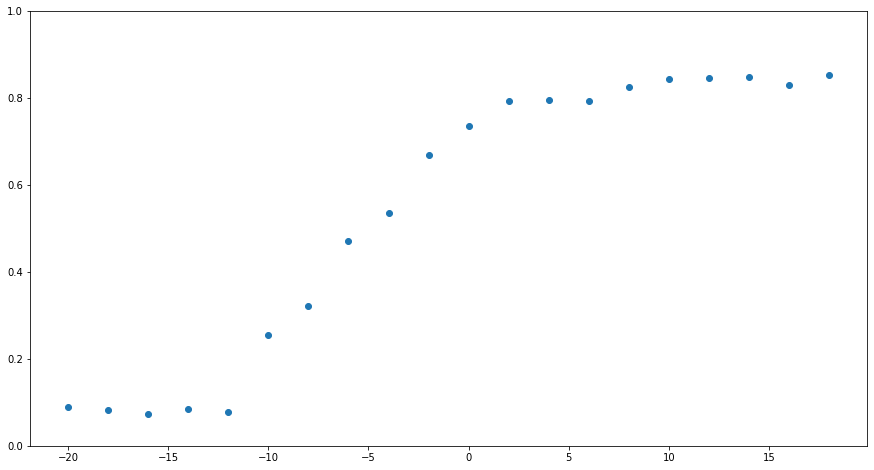

In [10]:
mu = df.loc[df['chan'] == 'mu']
smu = mu.loc[mu['epoch'] == 24]
plt.scatter(smu['snr'], smu['val_acc'])
plt.ylim([0,1])
plt.show()

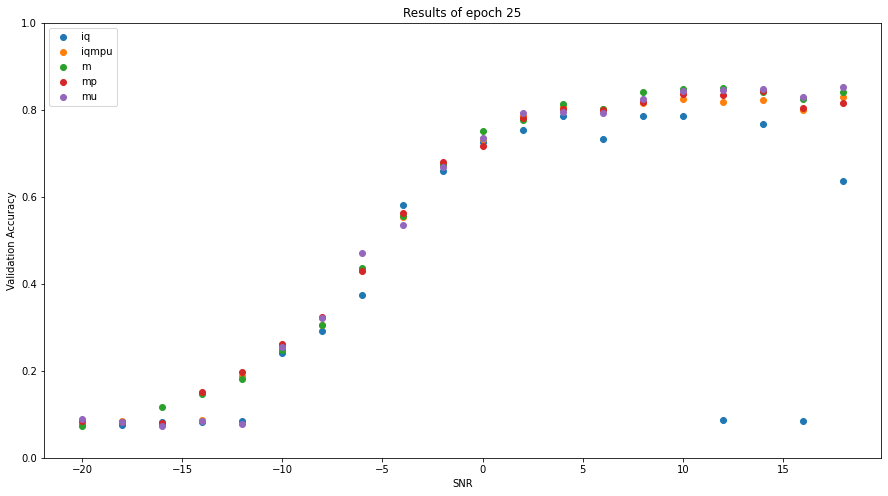

In [18]:
for chan in chans[2:]:
    ch = df.loc[df['chan'] == chan]
    ep = ch.loc[ch['epoch'] == 24]
    plt.scatter(ep['snr'], ep['val_acc'], label=chan)
    
plt.legend()
plt.xlabel('SNR')
plt.ylabel('Validation Accuracy')
plt.title("Results of epoch 25")
plt.ylim([0, 1])
plt.show()    

In [ ]:
for chan in chans:
    ch = df.loc[df['chan'] == chan]
    ep = ch.loc[ch['epoch'] == 24]
    plt.scatter(ep['snr'], ep['val_acc'], label=chan)
    
plt.legend()    
plt.ylim([0, 1])
plt.show()    

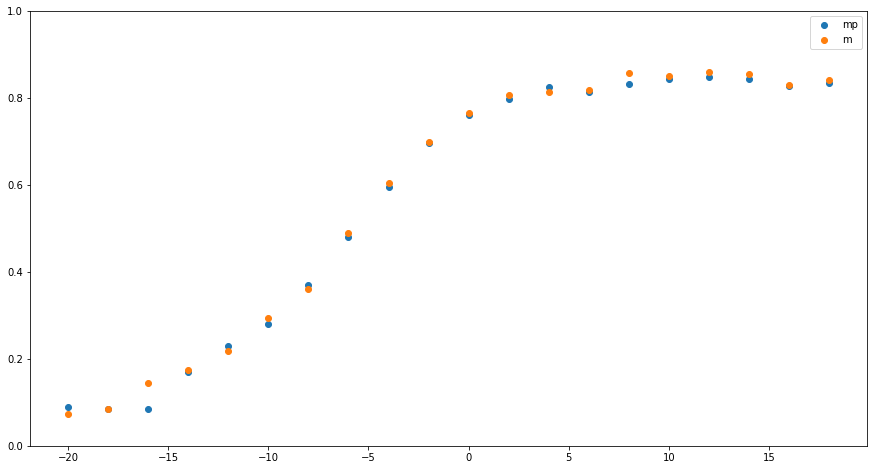

In [68]:
ch1 = 'mp'
ch2 = 'm'

df1 = df.loc[df['chan'] == ch1]
df2 = df.loc[df['chan'] == ch2]

for snr in snrs:
    df1_snr = df1.loc[df1['snr'] == int(snr)]
    df2_snr = df2.loc[df2['snr'] == int(snr)]
    plt.scatter(int(snr), df1_snr['val_acc'].max(), color='C0')
    plt.scatter(int(snr), df2_snr['val_acc'].max(), color='C1')
    
    
plt.legend([ch1, ch2])
plt.ylim([0, 1])
plt.show()


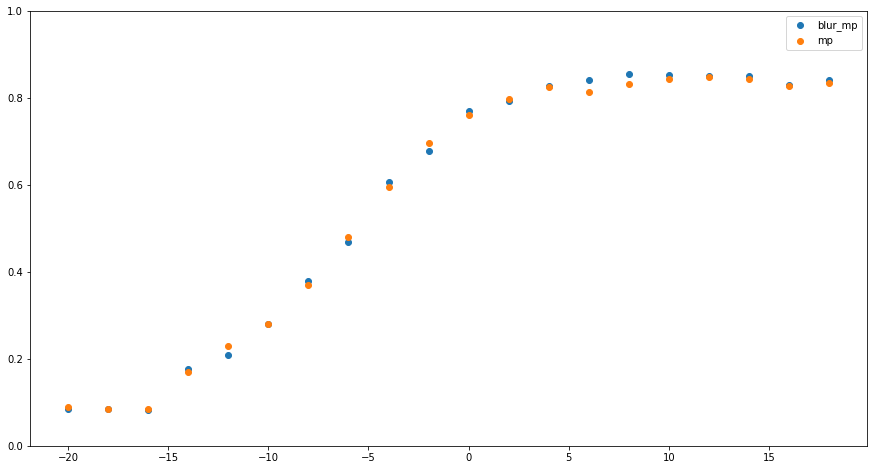

In [83]:
ch1 = 'blur_mp'
ch2 = 'mp'

df1 = df.loc[df['chan'] == ch1]
df2 = df.loc[df['chan'] == ch2]

for snr in snrs:
    df1_snr = df1.loc[df1['snr'] == int(snr)]
    df2_snr = df2.loc[df2['snr'] == int(snr)]
    plt.scatter(int(snr), df1_snr['val_acc'].max(), color='C0')
    plt.scatter(int(snr), df2_snr['val_acc'].max(), color='C1')
    
    
plt.legend([ch1, ch2])
plt.ylim([0, 1])
plt.show()
